In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-oct-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-oct-2022/train_9.csv
/kaggle/input/tabular-playground-series-oct-2022/train_3.csv
/kaggle/input/tabular-playground-series-oct-2022/train_4.csv
/kaggle/input/tabular-playground-series-oct-2022/test_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_8.csv
/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_5.csv
/kaggle/input/tabular-playground-series-oct-2022/train_2.csv
/kaggle/input/tabular-playground-series-oct-2022/test.csv
/kaggle/input/tabular-playground-series-oct-2022/train_0.csv
/kaggle/input/tabular-playground-series-oct-2022/train_7.csv
/kaggle/input/tabular-playground-series-oct-2022/train_1.csv
/kaggle/input/tabular-playground-series-oct-2022/train_6.csv


In [2]:
import pandas as pd
dtypes_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv')
dtypes = {k: v for (k, v) in zip(dtypes_df.column, dtypes_df.dtype)}
train0_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_0.csv', dtype=dtypes)

In [3]:
train0_df[(train0_df['game_num'] == 1) & (train0_df['event_id'] == 1002)].columns

Index(['game_num', 'event_id', 'event_time', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'p0_pos_x',
       'p0_pos_y', 'p0_pos_z', 'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost',
       'p1_pos_x', 'p1_pos_y', 'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z',
       'p1_boost', 'p2_pos_x', 'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y',
       'p2_vel_z', 'p2_boost', 'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x',
       'p3_vel_y', 'p3_vel_z', 'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z',
       'p4_vel_x', 'p4_vel_y', 'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y',
       'p5_pos_z', 'p5_vel_x', 'p5_vel_y', 'p5_vel_z', 'p5_boost',
       'boost0_timer', 'boost1_timer', 'boost2_timer', 'boost3_timer',
       'boost4_timer', 'boost5_timer', 'player_scoring_next',
       'team_scoring_next', 'team_A_scoring_within_10sec',
       'team_B_scoring_within_10sec'],
      dtype='object')

# EDA

## Coordinates

### Max/min player coordinates

#### X

In [4]:
print('Min x value {}'.format(train0_df[[col for col in train0_df.columns if 'pos_x' in col]].min().min()))
print('Max x value {}'.format(train0_df[[col for col in train0_df.columns if 'pos_x' in col]].max().max()))

Min x value -81.92720031738281
Max x value 81.95780181884766


#### Y

In [5]:
print('Min x value {}'.format(train0_df[[col for col in train0_df.columns if 'pos_y' in col]].min().min()))
print('Max x value {}'.format(train0_df[[col for col in train0_df.columns if 'pos_y' in col]].max().max()))

Min x value -119.81999969482422
Max x value 119.80000305175781


#### Z

In [6]:
print('Min x value {}'.format(train0_df[[col for col in train0_df.columns if 'pos_z' in col]].min().min()))
print('Max x value {}'.format(train0_df[[col for col in train0_df.columns if 'pos_z' in col]].max().max()))

Min x value 0.0031999999191612005
Max x value 40.863399505615234


### Max/min velocity coordinates

#### X

In [7]:
print('Min x value {}'.format(train0_df[[col for col in train0_df.columns if 'vel_x' in col]].min().min()))
print('Max x value {}'.format(train0_df[[col for col in train0_df.columns if 'vel_x' in col]].max().max()))

Min x value -99.20059204101562
Max x value 98.38719940185547


#### Y

In [8]:
print('Min x value {}'.format(train0_df[[col for col in train0_df.columns if 'vel_y' in col]].min().min()))
print('Max x value {}'.format(train0_df[[col for col in train0_df.columns if 'vel_y' in col]].max().max()))

Min x value -87.97200012207031
Max x value 101.14419555664062


#### Z

In [9]:
print('Min x value {}'.format(train0_df[[col for col in train0_df.columns if 'vel_z' in col]].min().min()))
print('Max x value {}'.format(train0_df[[col for col in train0_df.columns if 'vel_z' in col]].max().max()))

Min x value -62.99299621582031
Max x value 67.94279479980469


### Display a game situation

Let's approach this step by step. Ideally we would like to see the following elements:
- each player's represented in space with a different color for each team and a specific marker for players
- each player's velocity vector (arrow type?)
- the ball with it's specific marker

I first write a *player_scatter* method to display a given player's coordinates at one index of a given game event. We can then use that method in a loop to display each player in the 3D plot. The ball is simple to add as another element. I am still missing the velocity vectors.

As I think of displaying the velocity vectors, I realize that we would also need to figure out the coordinates of the goal posts of each team.


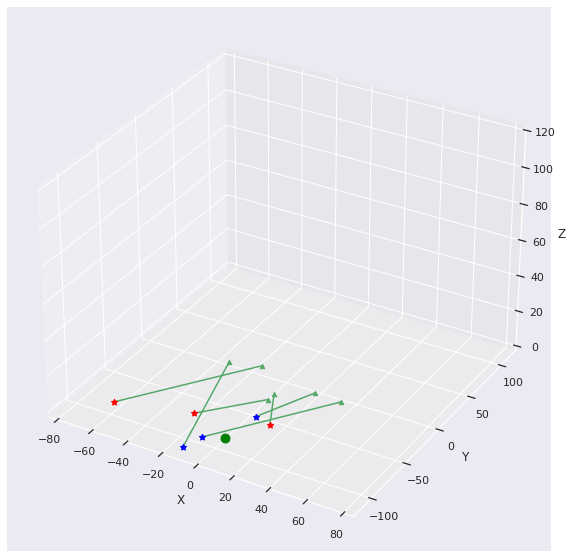

In [10]:
player_position_coordinates = ['p0_pos_x','p0_pos_y', 'p0_pos_z', 'p1_pos_x', 'p1_pos_y', 'p1_pos_z', 'p2_pos_x', 'p2_pos_y', 'p2_pos_z', 'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z','p5_pos_x', 'p5_pos_y','p5_pos_z']
vel = [col for col in train0_df.columns if '_vel_' in col]
ball_coordinates = ['ball_pos_x','ball_pos_y','ball_pos_z']

# isolate data on one event and one player for now
event = 2002
game_num = 2
idx = -2
data = train0_df[(train0_df['game_num'] == game_num) & (train0_df['event_id'] == event)][player_position_coordinates + ball_coordinates + vel].reset_index(drop=True)

# Position of player 0
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection = '3d')


def player_scatter(ax, data, player_num, idx):
    if player_num > 2:
        c = 'red'
    else:
        c = 'blue'
    
    coord = data.iloc[idx][['p' + str(player_num) + '_pos_' + k for k in ['x','y','z']]]
    vec = data.iloc[idx][['p' + str(player_num) + '_vel_' + k for k in ['x','y','z']]]
    
    ax.set_xlim3d(-82.0,82.0)
    ax.set_ylim3d(-120.0,120.0)
    ax.set_zlim3d(0.0,120.0)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    ax.plot([coord.iloc[0],vec.iloc[0]],[coord.iloc[1],vec.iloc[1]],[coord.iloc[2],vec.iloc[2]],color = 'g')
    ax.scatter(coord.iloc[0],coord.iloc[1],coord.iloc[2], s=40, c=c, marker=(5,1))
    ax.scatter(vec.iloc[0],vec.iloc[1],vec.iloc[2], color = 'g', marker = "^")
    return 0

for i in range(6):
    player_scatter(ax, data, i, idx)
    
ax.scatter(data.iloc[idx]['ball_pos_x'], data.iloc[idx]['ball_pos_y'], data.iloc[idx]['ball_pos_z'], s=80, c='green')

plt.show()

## Win conditions